Ονοματεπώνυμο: Ζαμάγιας Μιχαήλ Ανάργυρος

ΑΜ: ΤΠ5000

## Import modules

In [1]:
import mygene
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm, tree, metrics

# Data pre-processing

## Read datasets

In [2]:
datasets = [
    'http://139.91.190.186/tei/bioinformatics/LungTrain.txt',
    'http://139.91.190.186/tei/bioinformatics/LungTest.txt',
    'http://139.91.190.186/tei/bioinformatics/c2.cp.kegg.v7.4.entrez.gmt'
]
training_dataset, testing_dataset, kegg_dataset = [
    pd.read_csv(dataset, sep='\t')
    for dataset in datasets
]

In [3]:
def process_data(dataset: pd.DataFrame) -> [pd.Series, pd.Series, pd.DataFrame]:
    """To process read datasets.
    Firstly, returns gene names as a pd.Series object.
    Secondly, returns label names as a pd.Series object without Gene label and numbers at the end of Cancer and Normal columns.
    Thirdly, returns a processed dataset in the following ways:
        -   Its columns are renamed by the dataset_labels list.
        -   It gets transposed.
    Args:
        dataset(pd.DataFrame): Read dataset.
    Returns:
        [np.array, np.array, np.array]: Returns a tuple containing dataset genes, dataset labels and processed dataset as np.arrays.
    """
    altered_dataset = dataset
    dataset_genes = altered_dataset.iloc[:, 0]
    dataset_labels = pd.Series(
        [
            'Cancer' if 'Cancer' in dataset_column else 'Normal' if 'Normal' in dataset_column else dataset_column
            for dataset_column in list(altered_dataset.columns)
        ]
    )
    altered_dataset = altered_dataset.set_axis(dataset_labels, axis='columns').T.iloc[1:]
    return [dataset_genes, dataset_labels[1:], altered_dataset]


In [4]:
training_genes, train_labels, train_features = process_data(training_dataset)
testing_genes, test_labels, test_features = process_data(testing_dataset)

# Data analysis

## Support Vector Machines model

### Train the SVM model with training dataset.

In [5]:
svm_model = svm.SVC(kernel='linear').fit(train_features, train_labels)

### Run trained SVM model on testing dataset and calculate its prediction, confusion matrix and accuracy.

In [6]:
svm_prediction = svm_model.predict(test_features)
svm_confusion_matrix = metrics.confusion_matrix(test_labels, svm_prediction)
svm_accuracy = svm_model.score(test_features, test_labels)

### Print its prediction, confusion matrix and accuracy.

In [7]:
print(svm_prediction)
print(svm_confusion_matrix)
print(svm_accuracy)

['Normal' 'Normal' 'Cancer' 'Cancer' 'Normal' 'Cancer' 'Normal' 'Cancer'
 'Normal' 'Normal' 'Normal' 'Normal' 'Cancer' 'Normal' 'Cancer' 'Normal'
 'Cancer' 'Normal' 'Cancer' 'Cancer' 'Cancer' 'Cancer' 'Cancer' 'Normal'
 'Cancer' 'Normal' 'Cancer' 'Cancer' 'Normal' 'Normal']
[[14  0]
 [ 1 15]]
0.9666666666666667


## Decision tree model

### Train decision tree model with training dataset.

In [8]:
tree_model = tree.DecisionTreeClassifier().fit(train_features, train_labels)
decision_tree_accuracy = tree_model.score(test_features, test_labels)

### Print its accuracy and tree plot.

0.8


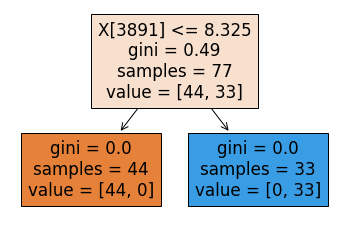

In [9]:
print(decision_tree_accuracy)
decision_tree_plot = tree.plot_tree(tree_model, filled=True)
# print(decision_tree_plot)

### Run trained tree model on testing dataset, calculate its prediction and print its confusion matrix.

In [10]:
decision_tree_prediction = tree_model.predict(test_features)
decision_tree_confusion_matrix = metrics.confusion_matrix(test_labels, decision_tree_prediction)
print(decision_tree_confusion_matrix)

[[10  4]
 [ 2 14]]


### Comment on SVM and Decision tree models, and reason which one is more efficient, if there is any difference.

In [11]:
def calculate_model_delta(object_one: np.array, object_two: np.array) -> [str, float]:
    delta_ratio = np.mean(object_one != object_two)
    delta_percentage = delta_ratio * 100
    return ['Yes' if delta_ratio else 'No', delta_percentage]

In [12]:
accuracy_delta_bool, accuracy_delta_percentage = calculate_model_delta(svm_accuracy, decision_tree_accuracy)
prediction_delta_bool, prediction_delta_percentage = calculate_model_delta(svm_prediction, decision_tree_prediction)
confusion_matrix_delta_bool, percentage_delta_confusion_matrix = calculate_model_delta(svm_confusion_matrix,
                                                                                       decision_tree_confusion_matrix)

#### Comparison between SVM accuracy and Decision tree accuracy.

In [13]:
print(f'Is there any difference in accuracy between models?\n{accuracy_delta_bool}, ', end='')
print(f'there is a {accuracy_delta_percentage}% difference in accuracy between models.')

Is there any difference in accuracy between models?
Yes, there is a 100.0% difference in accuracy between models.


#### Comparison between test labels, SVM prediction and Decision tree prediction.

##### Comparison between SVM prediction and Decision tree prediction.

In [14]:
print(f'Is there any difference in prediction between models?\n{prediction_delta_bool}, ', end='')
print(f'there is a {prediction_delta_percentage}% difference in prediction between models.')

Is there any difference in prediction between models?
Yes, there is a 23.333333333333332% difference in prediction between models.


##### Comparison between test labels and SVM prediction.

In [15]:
_, percentage_delta_test_svm_prediction = calculate_model_delta(test_labels, svm_prediction)
print(f'Difference percentage between test labels and SVM prediction:\n{percentage_delta_test_svm_prediction}%')

Difference percentage between test labels and SVM prediction:
3.3333333333333335%


##### Comparison between test labels and Decision tree prediction.

In [16]:
_, percentage_delta_test_decision_tree_prediction = calculate_model_delta(test_labels, decision_tree_prediction)
print(
    f'Difference percentage between test labels and Decision tree prediction:\n{percentage_delta_test_decision_tree_prediction}%')

Difference percentage between test labels and Decision tree prediction:
20.0%


#### Comparison between test label, SVM and Decision tree confusion matrices.

##### Comparison between SVM and Decision tree confusion matrices.

In [17]:
print(f'Is there any difference in confusion matrix between models?\n{confusion_matrix_delta_bool}, ', end='')
print(f'there is a {percentage_delta_confusion_matrix}% difference in confusion matrix between models.')

Is there any difference in confusion matrix between models?
Yes, there is a 100.0% difference in confusion matrix between models.


##### Comparison between test labels and SVM confusion matrix.

In [18]:
test_confusion_matrix = metrics.confusion_matrix(test_labels, test_labels)
_, percentage_delta_test_svm_confusion_matrix = calculate_model_delta(test_confusion_matrix, svm_confusion_matrix)
print(
    f'Difference percentage between test labels and SVM confusion matrices:\n{percentage_delta_test_svm_confusion_matrix}%')

Difference percentage between test labels and SVM confusion matrices:
50.0%


##### Comparison between test labels and Decision tree confusion matrix.

In [19]:
_, percentage_delta_test_decision_tree_confusion_matrix = calculate_model_delta(test_confusion_matrix,
                                                                                decision_tree_confusion_matrix)
print(
    f'Difference percentage between test labels and Decision tree confusion matrices:\n{percentage_delta_test_decision_tree_confusion_matrix}%')

Difference percentage between test labels and Decision tree confusion matrices:
100.0%


Considering the previous results, SVM model is generally more efficient than the Decision tree model, and this can be observered from the following comparisons:

1. Predictions between test labels, SVM and Decision tree. The SVM model has the smallest deviation from the default test labels, a 3.3% in contrast to the 6.6% of the Decision tree model.

2. Confusion matrices between test labels, SVM and Decision tree. The SVM model again has a stable 50% deviation from the default test label confusion matrix, and a stable one, compared to the Decision tree's confusion matrix deviation which is less stable and often equals 100% deviation from the default test label confusion matrix

Βάσει των παραπάνω αποτελεσμάτων, το SVM μοντέλο είναι γενικότερα πιο αποδοτικό από το Decision tree. Αυτό φαίνεται στις εξής συγκρίσεις:

1. Των προβλέψεων μεταξύ των test labels, SVM και Decision tree. Παρατηρείται οτι σε σχέση με την πρότυπη λίστα test labels το μοντέλο SVM έχει τη μικρότερη απόκλιση, 3.3% έναντι 6.6% του μοντέλου Decision tree.

2. Των πινάκων σύγχυσης μεταξύ των τεστ label as VM και την season tree. Παρατηρείται ότι σε σχέση με τον πρότυπο πίνακα σύγχυσης το μοντέλο SVM έχει σταθερά απόκλιση 50% ενώ το Decision tree μοντέλο συχνά δίνει 100% απόκλιση.

## Gene selection

### Calculate feature importance of every gene from SVM model.

I'm creating a new dataframe from the Gene column from the beggining of the notebook, the test features and the calculated genes SVM feature significance.

In [20]:
altered_testing_dataset = pd.concat([
    pd.DataFrame({'Gene': testing_genes}).T,
    test_features,
    pd.DataFrame({'SVM Feature Importance': svm_model.coef_[0]}).T
], axis=0).T

### Sort DataFrame by the `'SVM Feature Importance'` column

In [21]:
sorted_svm_feature_importance_testing_dataset = altered_testing_dataset.sort_values(by='SVM Feature Importance')

### Select the first 20 genes and the last 20 genes.

In [22]:
gene_selection = pd.concat([
    sorted_svm_feature_importance_testing_dataset.head(20),
    sorted_svm_feature_importance_testing_dataset.tail(20)
], axis=0).T.sort_index().T

### Create a heaetmap from the previous gene selection.

<AxesSubplot:>

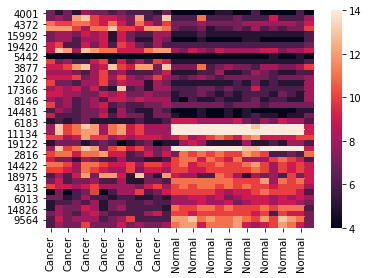

In [31]:
sns.heatmap(gene_selection.drop('Gene', inplace=False, axis=1).astype('int').iloc[:, :-1])

# Data annotation

## Use module `mygene` and find the `entrez` names of the prevously selected 40 genes

In [24]:
mg = mygene.MyGeneInfo()

In [25]:
gene_results = pd.DataFrame(
    mg.querymany(
        list(gene_selection['Gene']),
        scopes='reporter',
        fields='entrezgene',
        species='human',
        verbose='False',
        returnall=False,
        as_dataframe=False
    )
).drop('notfound', inplace=False, axis=1).dropna()

querying 1-40...done.
Finished.
1 input query terms found dup hits:
	[('220057_at', 2)]
1 input query terms found no hit:
	['206658_at']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [26]:
kegg_dataset = kegg_dataset.iloc[:, 2:]

## Find the 5 pathways which contain the most of the previously selected 40 genes and print their name.

In [27]:
gene_results['entrezgene'] = gene_results['entrezgene'].astype('int')

In [28]:
kegg_dataset.dropna(axis='columns')

,805,801,390442,120787,390445,157,391194,391196,391195,79501
0,79868,57171,6184,199857,11253,10195,2683,4249,6185,3703
1,64772,2720,4126,4125,2629,129807,4759,4758,2517,2519
2,8693,117248,168391,11226,11227,57452,442117,114805,9245,55568
3,9955,10855,60495,2720,2990,8372,2799,23553,3373,8692
4,9435,11041,10678,8534,2683,93010,6483,8703,6482,8704
...,...,...,...,...,...,...,...,...,...,...
180,3126,3127,3111,3112,3125,3562,7124,6356,8288,2207
181,3111,3112,941,942,940,3442,3441,3440,7253,7252
182,3126,3127,3111,3112,3125,941,942,940,7124,3458
183,3126,3802,3127,3111,3112,3125,941,942,3824,3821


In [29]:
gene_results

,query,_id,_score,entrezgene
0,204475_at,4312,13.367868,4312
1,206239_s_at,6690,13.435543,6690
2,204846_at,1356,12.892537,1356
3,209875_s_at,6696,12.524474,6696
4,216623_x_at,27324,13.450085,27324
5,214774_x_at,27324,13.377530,27324
6,220057_at,653067,13.450085,653067
7,220057_at,653220,13.414069,653220
8,201884_at,1048,13.377530,1048
9,205916_at,6278,13.367868,6278


# Pathway viewer

## Use `IPython.display.HTML` and visualize these 5 pathways in `iframes`.